# Fraud Detection
Frauds can occur in many forms such as in financial sectors, banking, government agencies, insurance, and law enforcement etc. With the advancement in technology, there are new and creative ways to commit frauds, hence the need to come up with better techniques to identify them.


In this notebook, we will use machine learning to identify fradulent transactions.

## Load the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [1]:
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#formatting
from colorama import Fore, Style
pd.option_context("display.max_columns", None)

In [2]:
df = pd.read_csv('fraudTrain.csv')
#Drop the unnamed column
df.drop(columns = ['Unnamed: 0'], inplace = True)
display(df)
print("Shape of Training set:",df.shape,"\n")
#Display the columns in the data
print("The columns are:",df.columns)

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

Shape of Training set: (1296675, 22) 

The columns are: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


The dataset contains 1,296,675 and 22 columns.
Below is the information on column names:
## Transaction details
 - 'trans_date_trans_time': Transaction DateTime 
- 'trans_num': Transaction Number
- 'unix_time': UNIX Time of transaction
- 'amt': Amount of Transaction

## Credit card holder details
- 'cc_num': Credit Card Number of Customer
- 'first': First Name of Credit Card Holder
- 'last': Last Name of Credit Card Holder
- 'gender': Gender of Credit Card Holder
- 'job': Job of Credit Card Holder
- 'dob': Date of Birth of Credit Card Holder

## Credit card holder's location details
- 'street': Street Address of Credit Card Holder
- 'city': City of Credit Card Holder
- 'state': State of Credit Card Holder
- 'zip': Zip of Credit Card Holder
- 'lat': Latitude Location of Credit Card Holder
- 'long': Longitude Location of Credit Card Holder
- 'city_pop': Credit Card Holder's City Population

## Merchant details
- 'merchant': Merchant Name
- 'category': Category of Merchant
- 'merch_lat': Latitude Location of Merchant
- 'merch_long': Longitude Location of Merchant

## Target feature
- 'is_fraud': Fraud Flag

## Exploratory Data Analysis
1. Data types of columns
2. Check for null values and duplicate rows

In [3]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### Change data type
The columns 'trans_date_trans_time' and 'dob' are object data types. We need to convert them to date time.

In [4]:
#change to date and time
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
display(df)
print("Date types after conversion:\n")
print(df.dtypes)

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job        dob  \
0                Psychologist, counselling 1988-03-09   
1        Special educational needs teacher 1978-06-21   
2              Nature conservation officer 1962-01-19   
3                          Patent attorney 1967-01-12   
4           Dance movement psychotherapist 1986-03-28   
...                                    ...        ...   
1296670                       Geoscientist 1961-11-24   
1296671   Production assistant, television 1979-12-11   
1296672                    Naval architect 1967-08-30   
1296673              Volunteer coordinator 1980-08-18   
1296674           Therapist, horticultural 1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b

Date types after conversion:

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object


In [5]:
#number of null values in each column
print("Number of null values in each column",df.isnull().sum())
#display duplicates
display(df[df.duplicated()])

Number of null values in each column trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


Empty DataFrame
Columns: [trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 22 columns]

## Let's compare different EDA libraries for this data

In [6]:
#Generating Sweetviz report
report = sv.analyze(df)
report.show_html("Credit_EDA_report.html") # specify a name for the report

                                             |      | [  0%]   00:00 -> (? left)

Report Credit_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
import ydata_profiling

df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Categories and Fraud

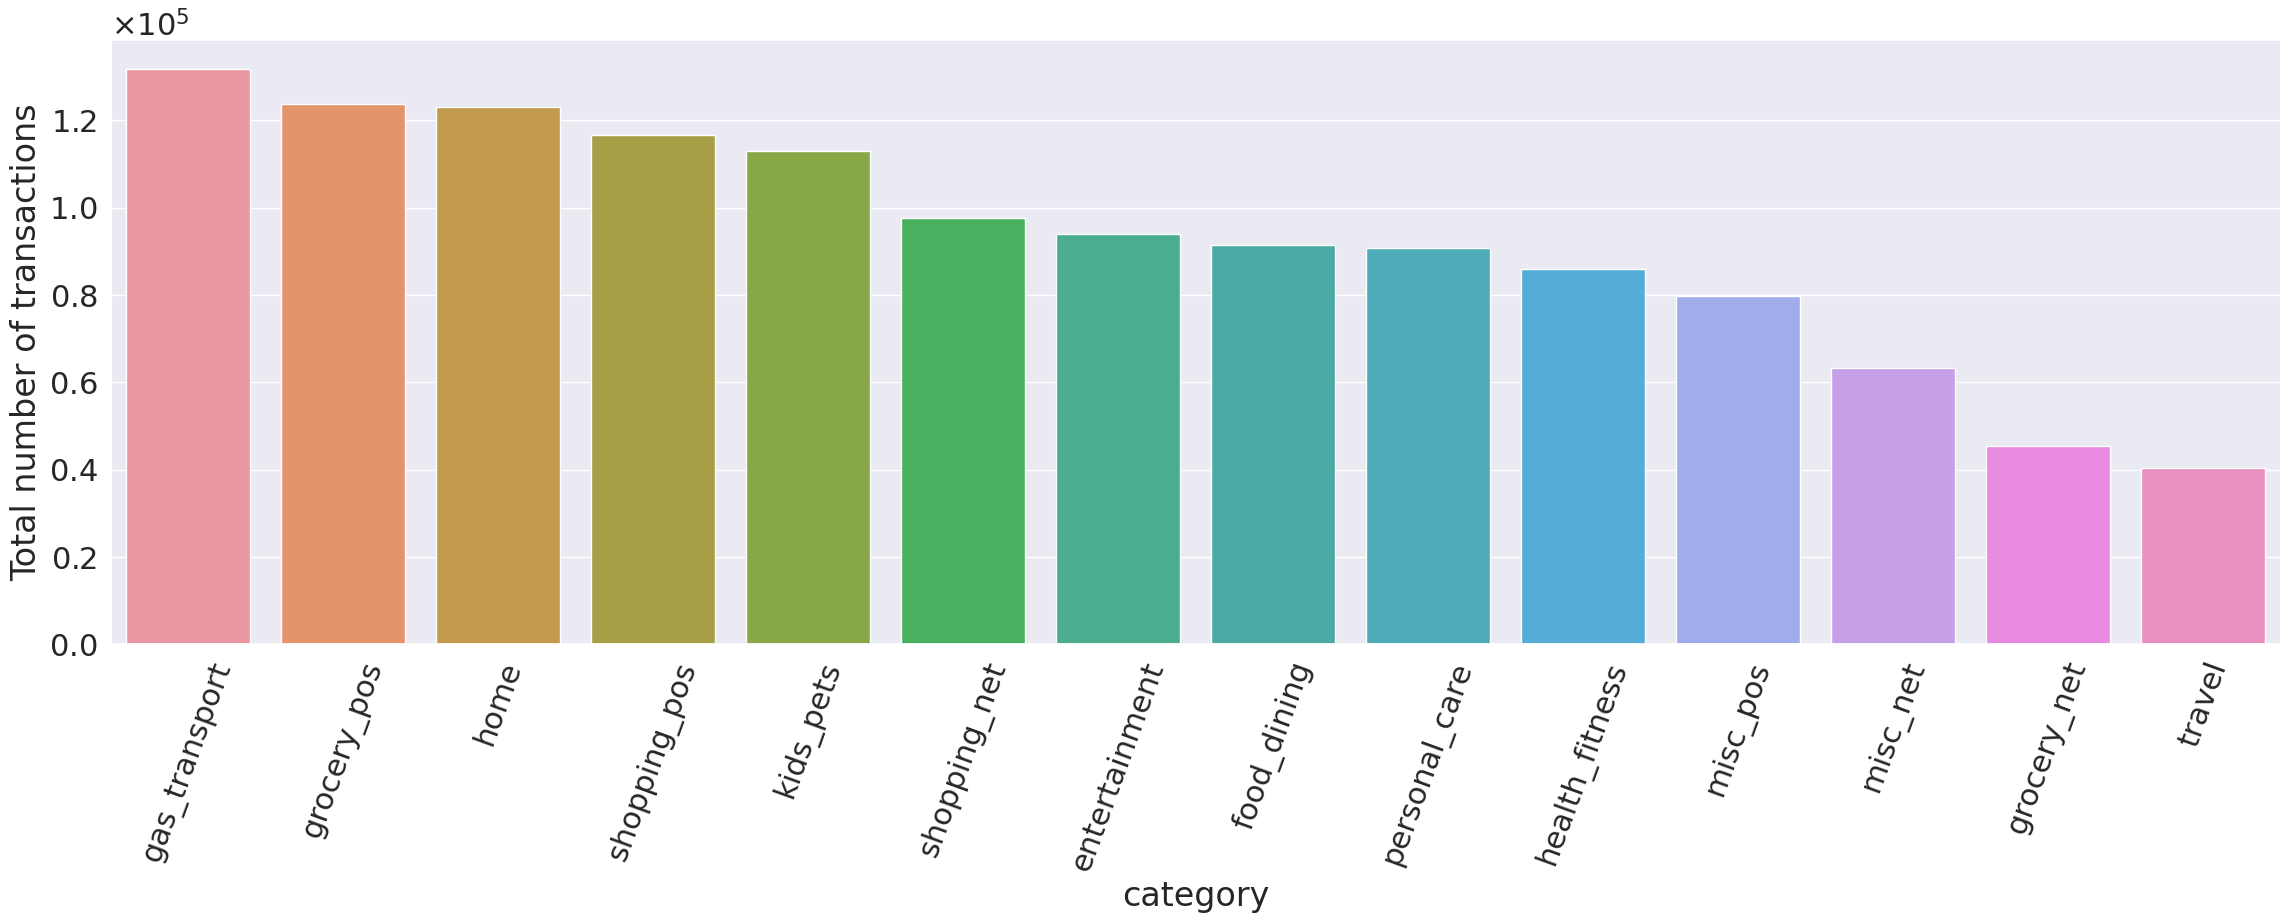

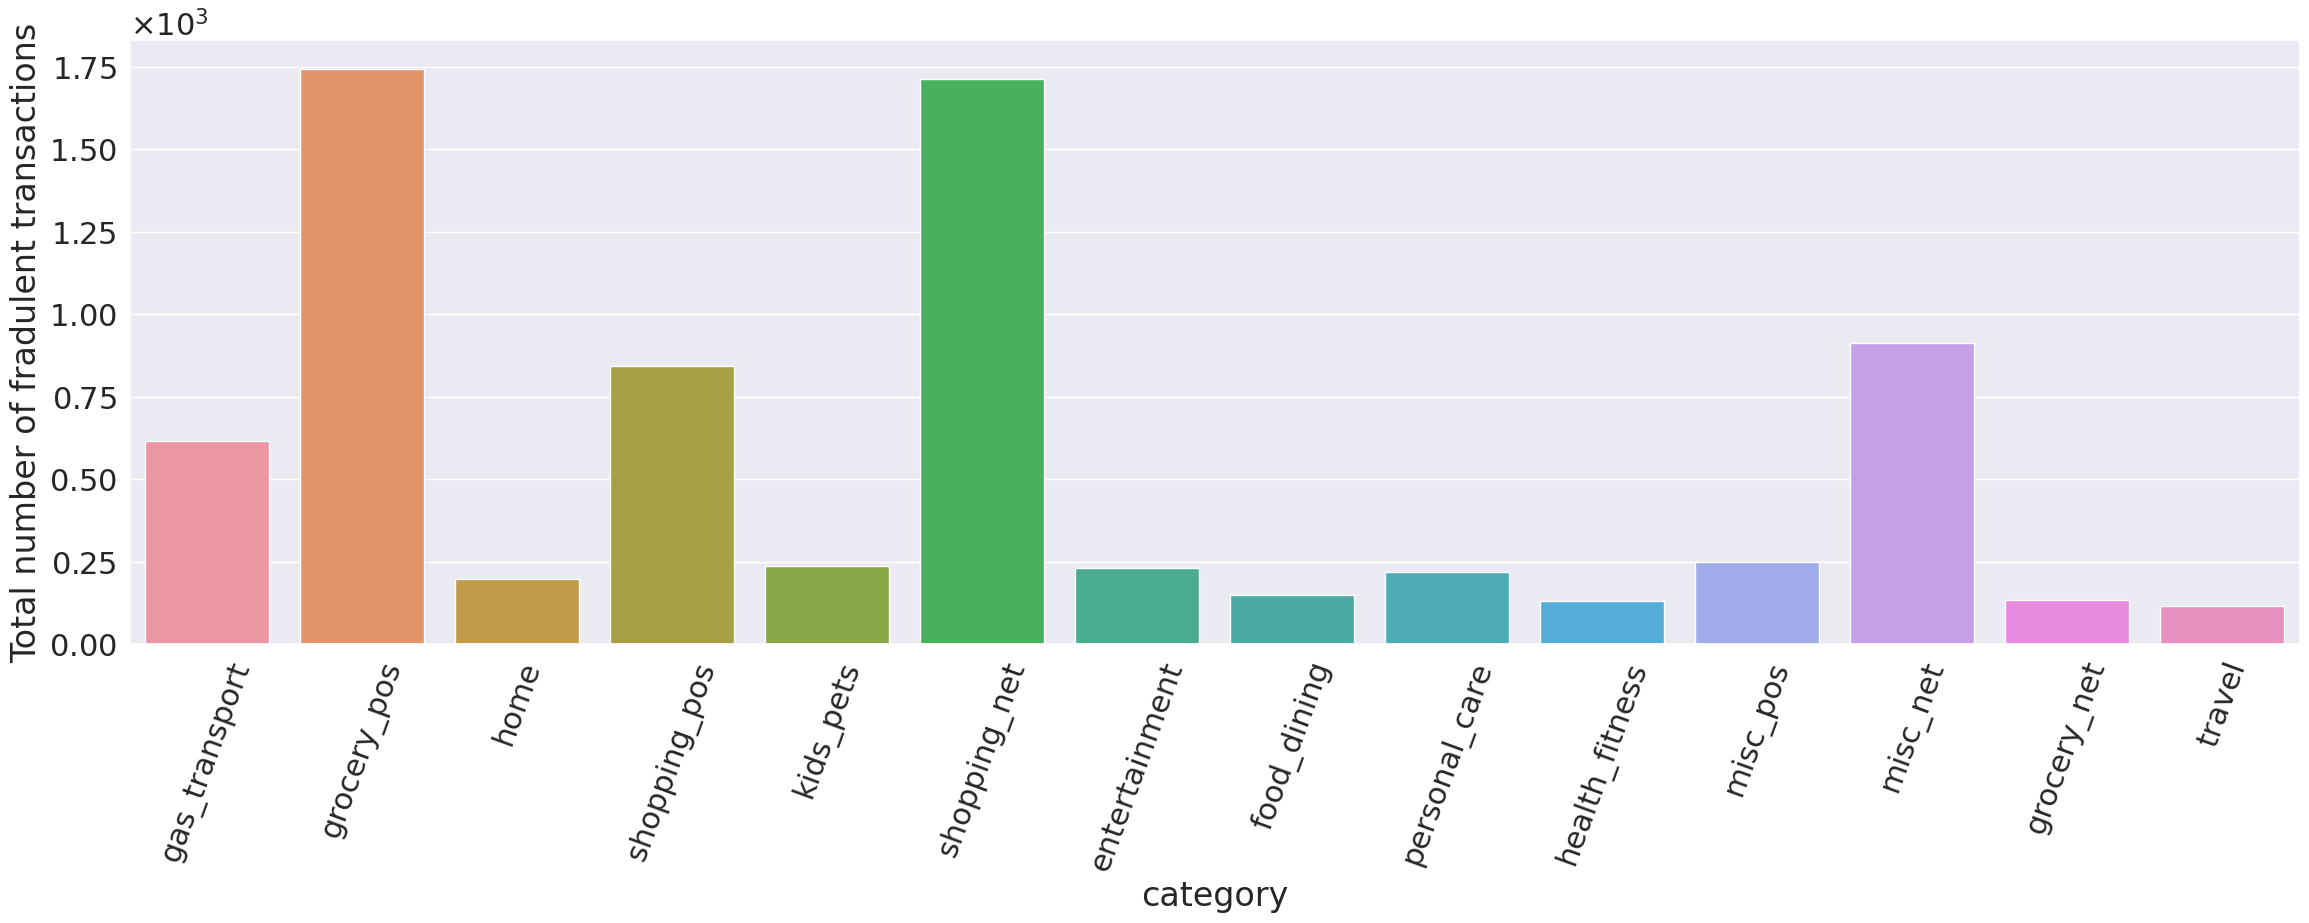

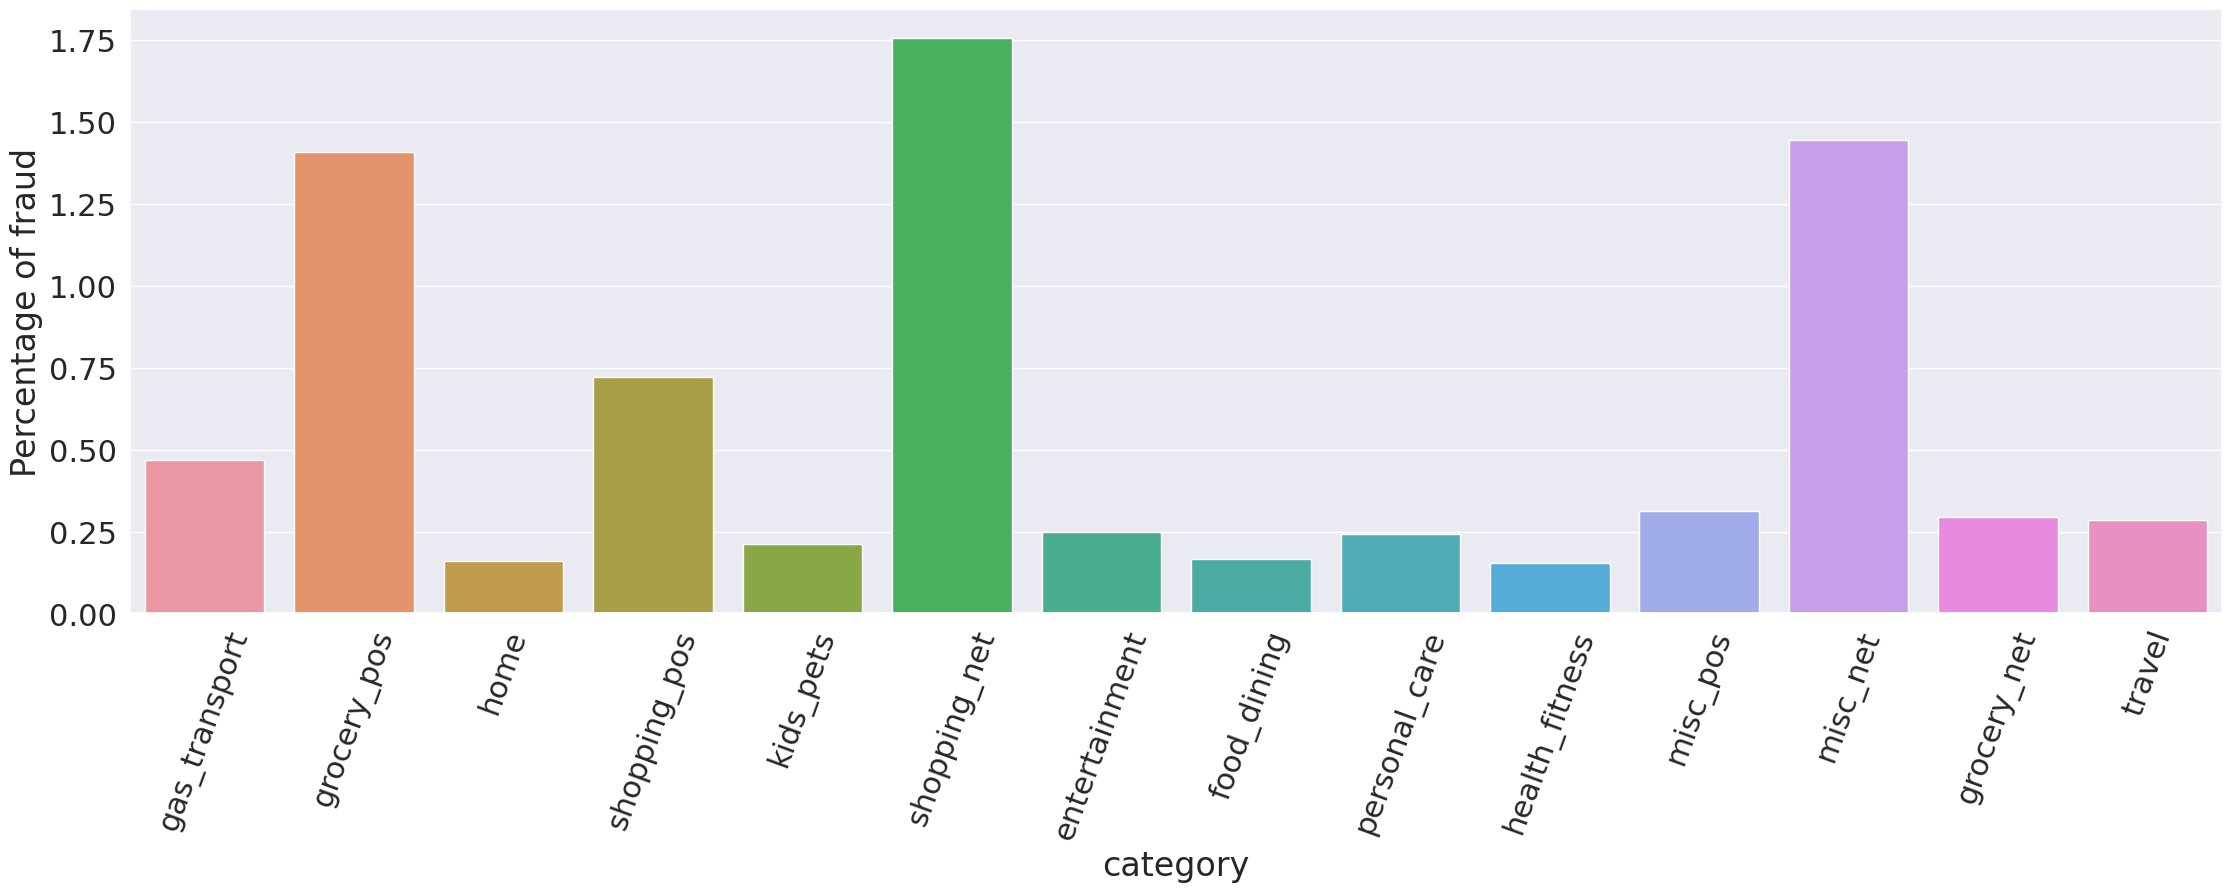

In [175]:
#To visualize total number of transactions per category
sns.set(font_scale = 2)
def total(col, df_func, y_lab):
    fig, ax = plt.subplots(figsize = (28, 8))
    #for scientific notation
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    ax.yaxis.set_major_formatter(formatter)
    if col == 'year_birth':
        #define order
        col_ord = df[col].value_counts().sort_index().index
    else:
        #define order
        col_ord = df[col].value_counts().index
    #count plot for transactions
    ax = sns.countplot(x = col, data = df_func, order = col_ord)
    plt.ylabel(y_lab)
    plt.xlabel(col)
    plt.xticks(rotation = 70)
    plt.show()

#To visualize the number of fraud transactions per category
def fraud_over_total(col, df):
    #Difference between non-fraud and fraud transactions
    #non fraud counts
    non_fraud = df[df['is_fraud'] == 0][col].value_counts().to_frame("Non Fraud Count")
    non_fraud = non_fraud.reset_index().rename(columns = {'index':col})
    #fraud counts
    fraud = df[df['is_fraud'] == 1][col].value_counts().to_frame("Fraud Count")
    fraud = fraud.reset_index().rename(columns = {'index':col})
    #merge the above two dataframes
    diff = pd.merge(non_fraud, fraud)
    diff['Total'] = diff['Fraud Count'] + diff['Non Fraud Count']
    diff['Percentage of fraud'] = 100*(diff['Fraud Count'])/(diff['Non Fraud Count'] + diff['Fraud Count'])
    #plot the difference
    diff['Ratio'] = diff['Fraud Count']/diff['Non Fraud Count']
    #For the order on x-axis
    if col == 'year_birth':
        #define order
        col_ord = df[col].value_counts().sort_index().index
    else:
        #define order
        col_ord = df[col].value_counts().index
    fig, ax = plt.subplots(figsize = (27, 8))
    sns.barplot(data = diff, x = col, y="Percentage of fraud", ax = ax, order = col_ord)
    plt.xticks(rotation = 70)
    plt.show()

#How are the transacations distributed over categories?
total("category", df, y_lab = "Total number of transactions")

#How are the fradulent transacations distributed over categories?
total("category", df[df['is_fraud']==1], y_lab = "Total number of fradulent transactions")

#Fraud
fraud_over_total('category', df)

## States and Fraud

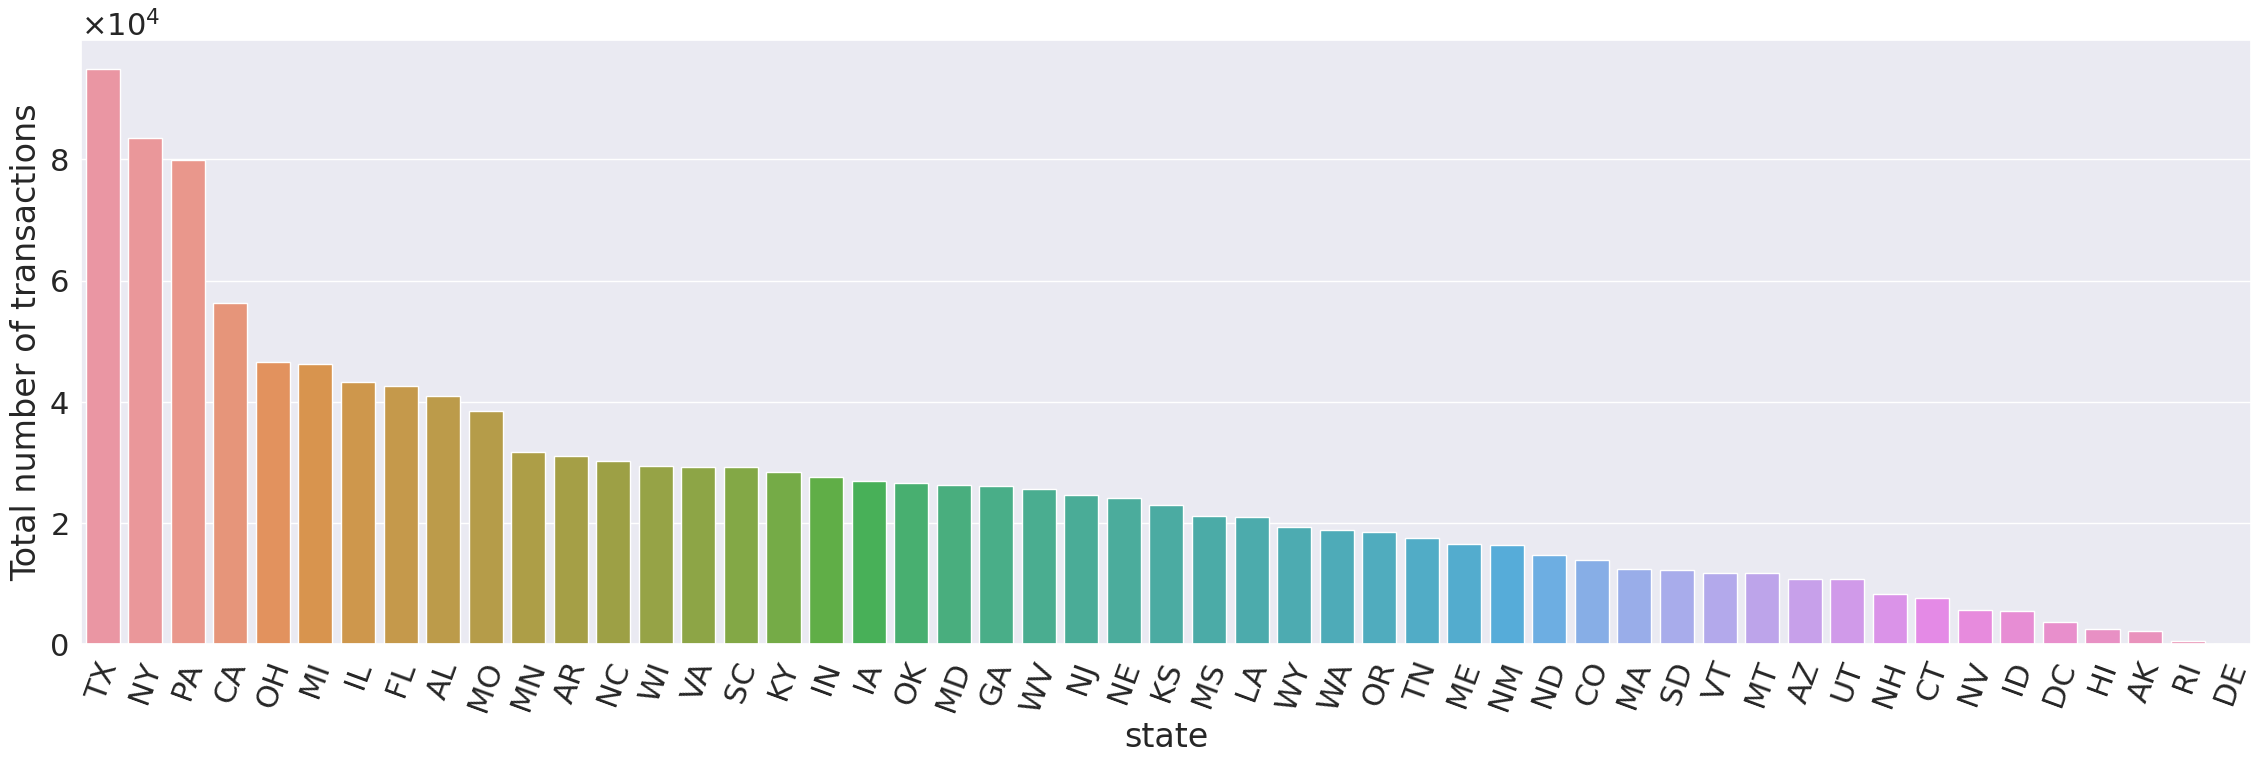

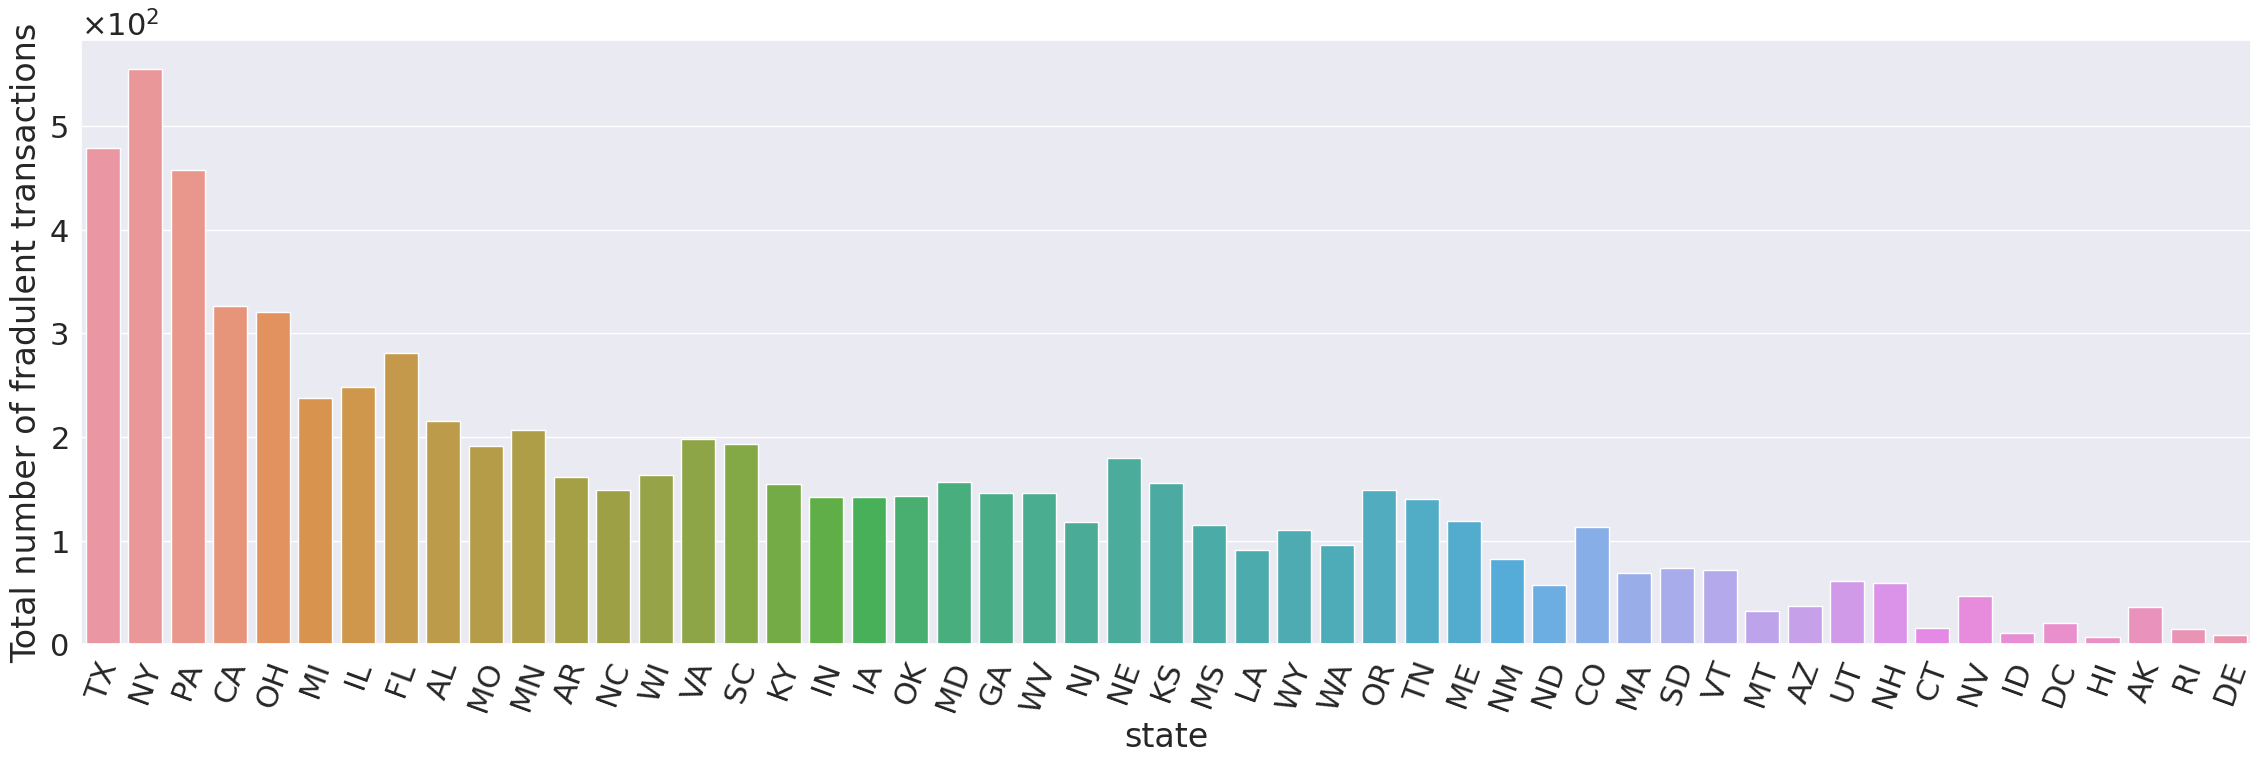

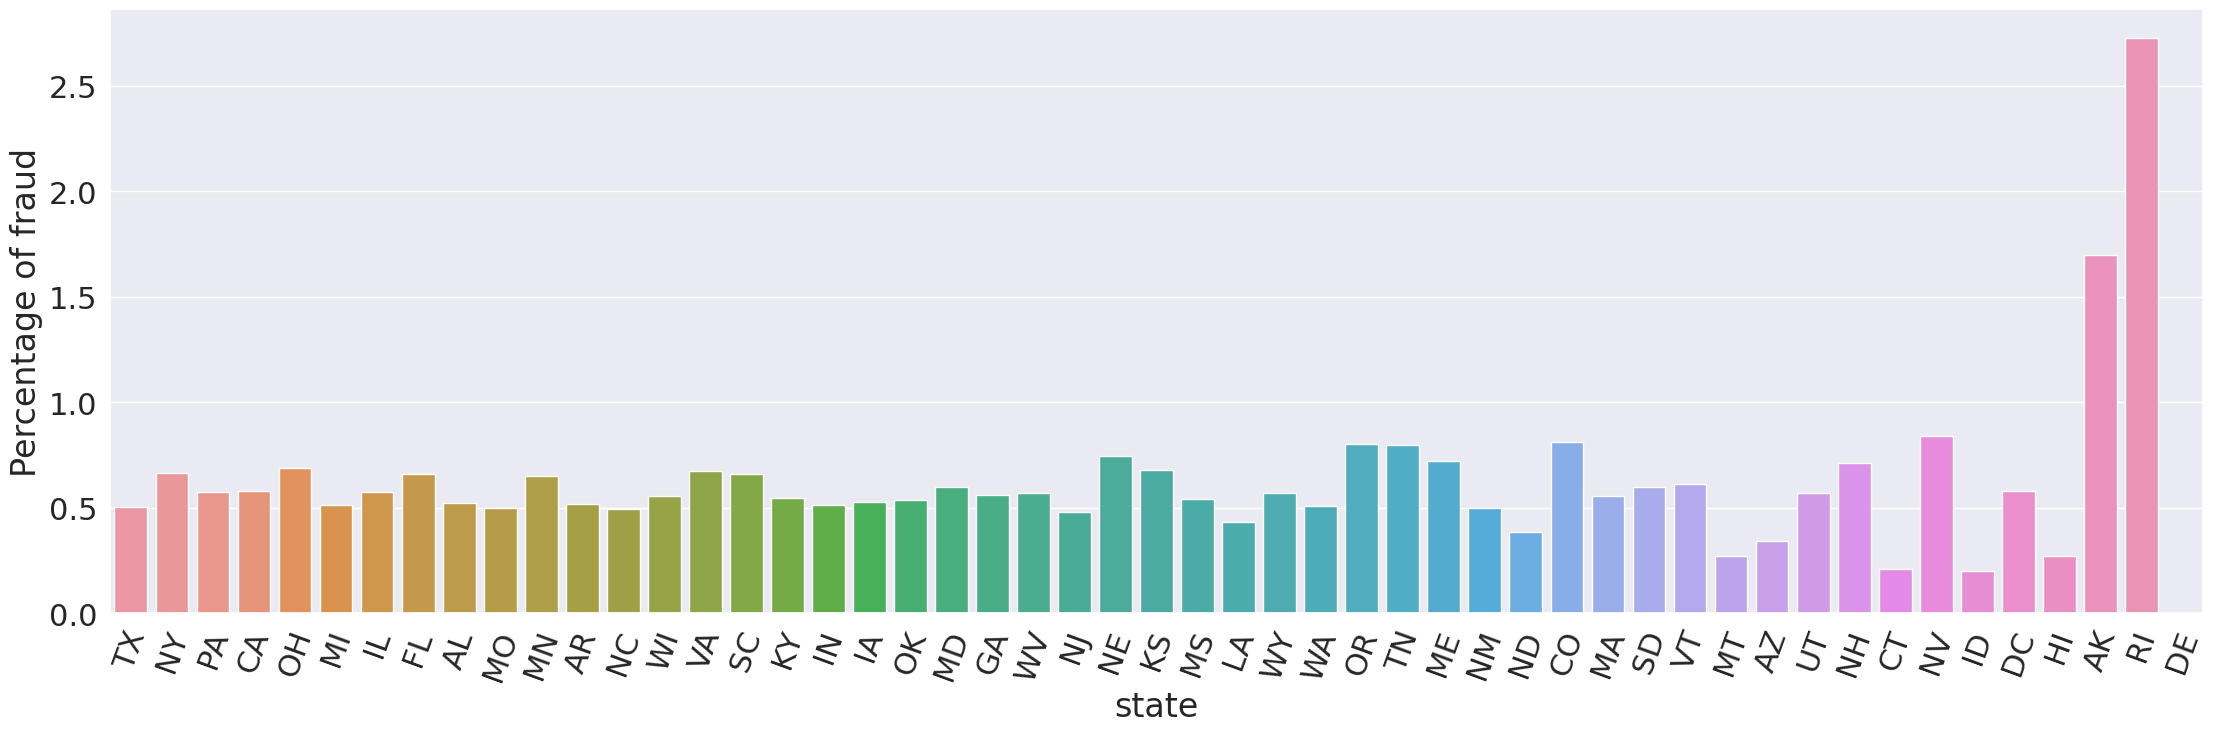

In [176]:
#How are the transacations distributed over states?
total_vs_fraud("state", df, y_lab = "Total number of transactions")

#How are the fradulent transacations distributed over states?
total("state", df[df['is_fraud']==1], y_lab = "Total number of fradulent transactions")

#Fraud
fraud_over_total('state', df)

## Gender and Fraud

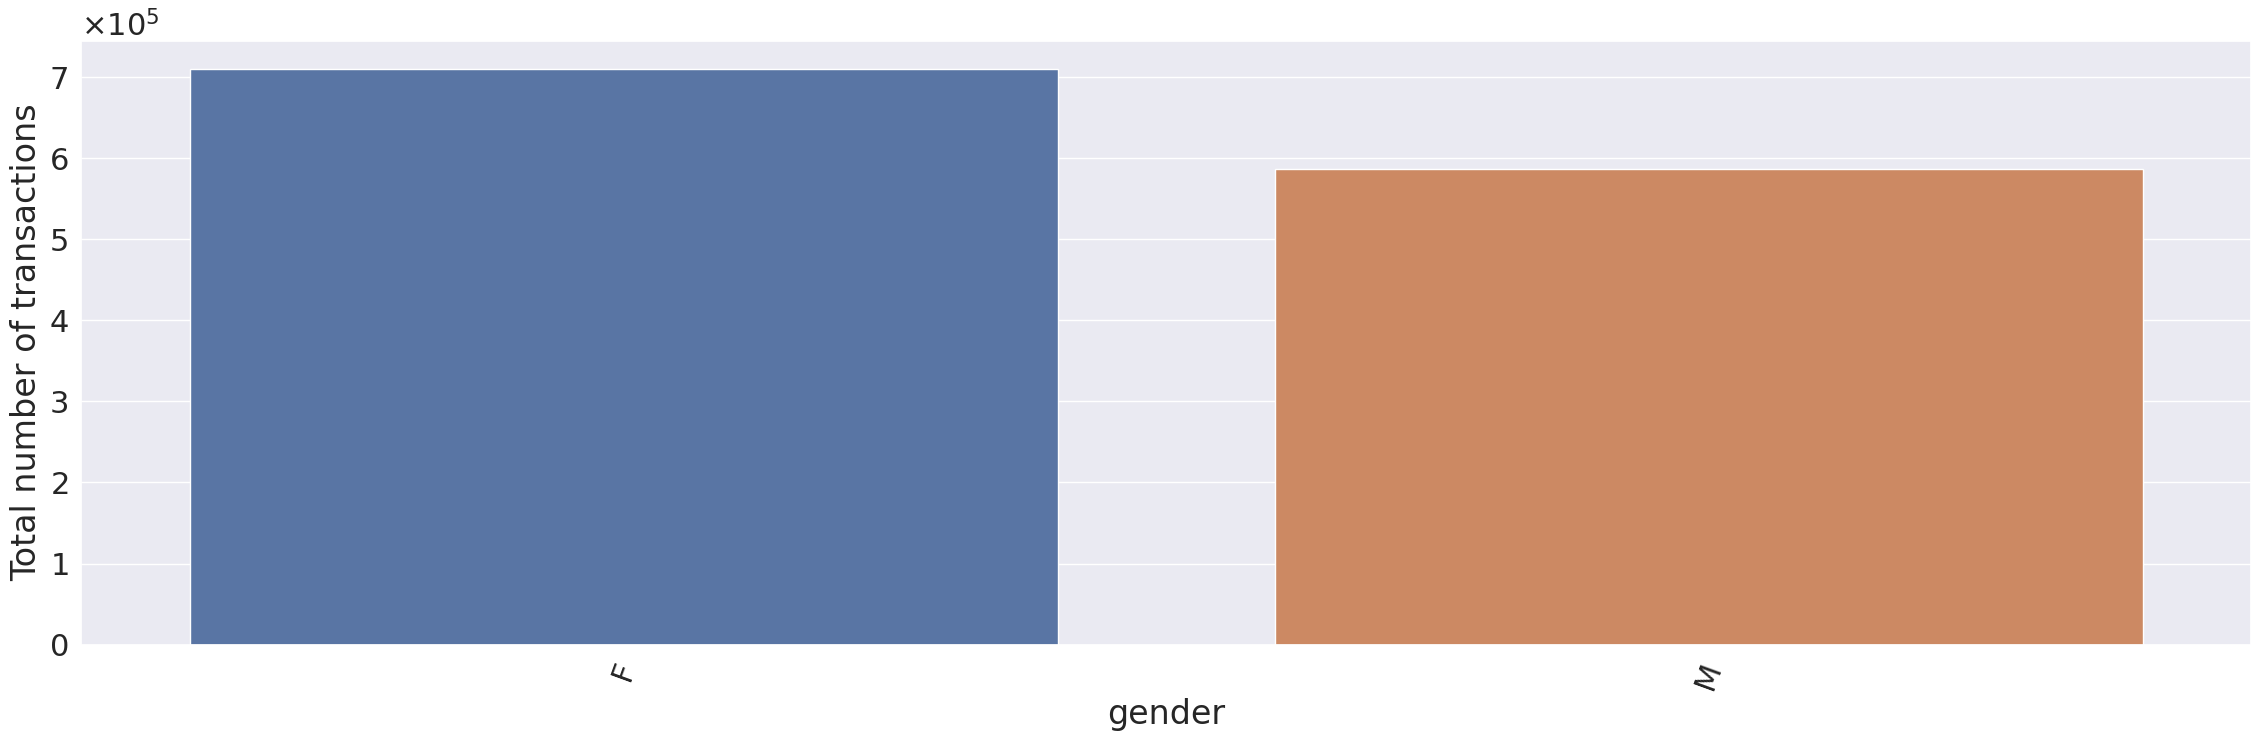

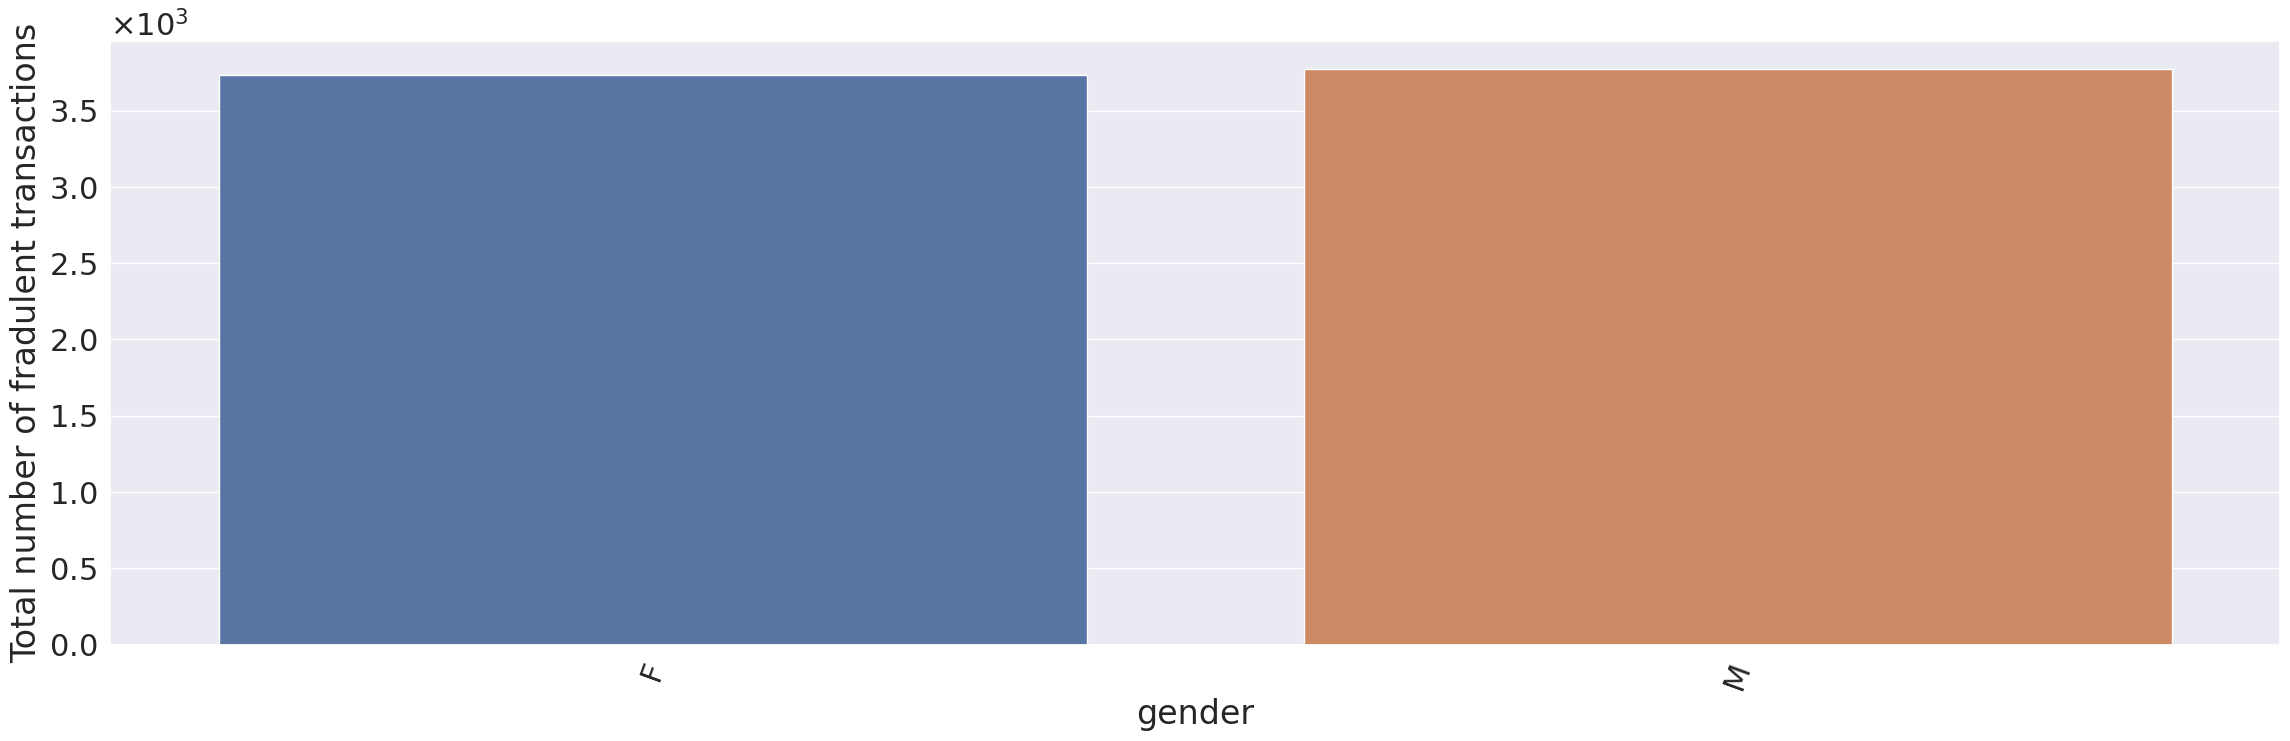

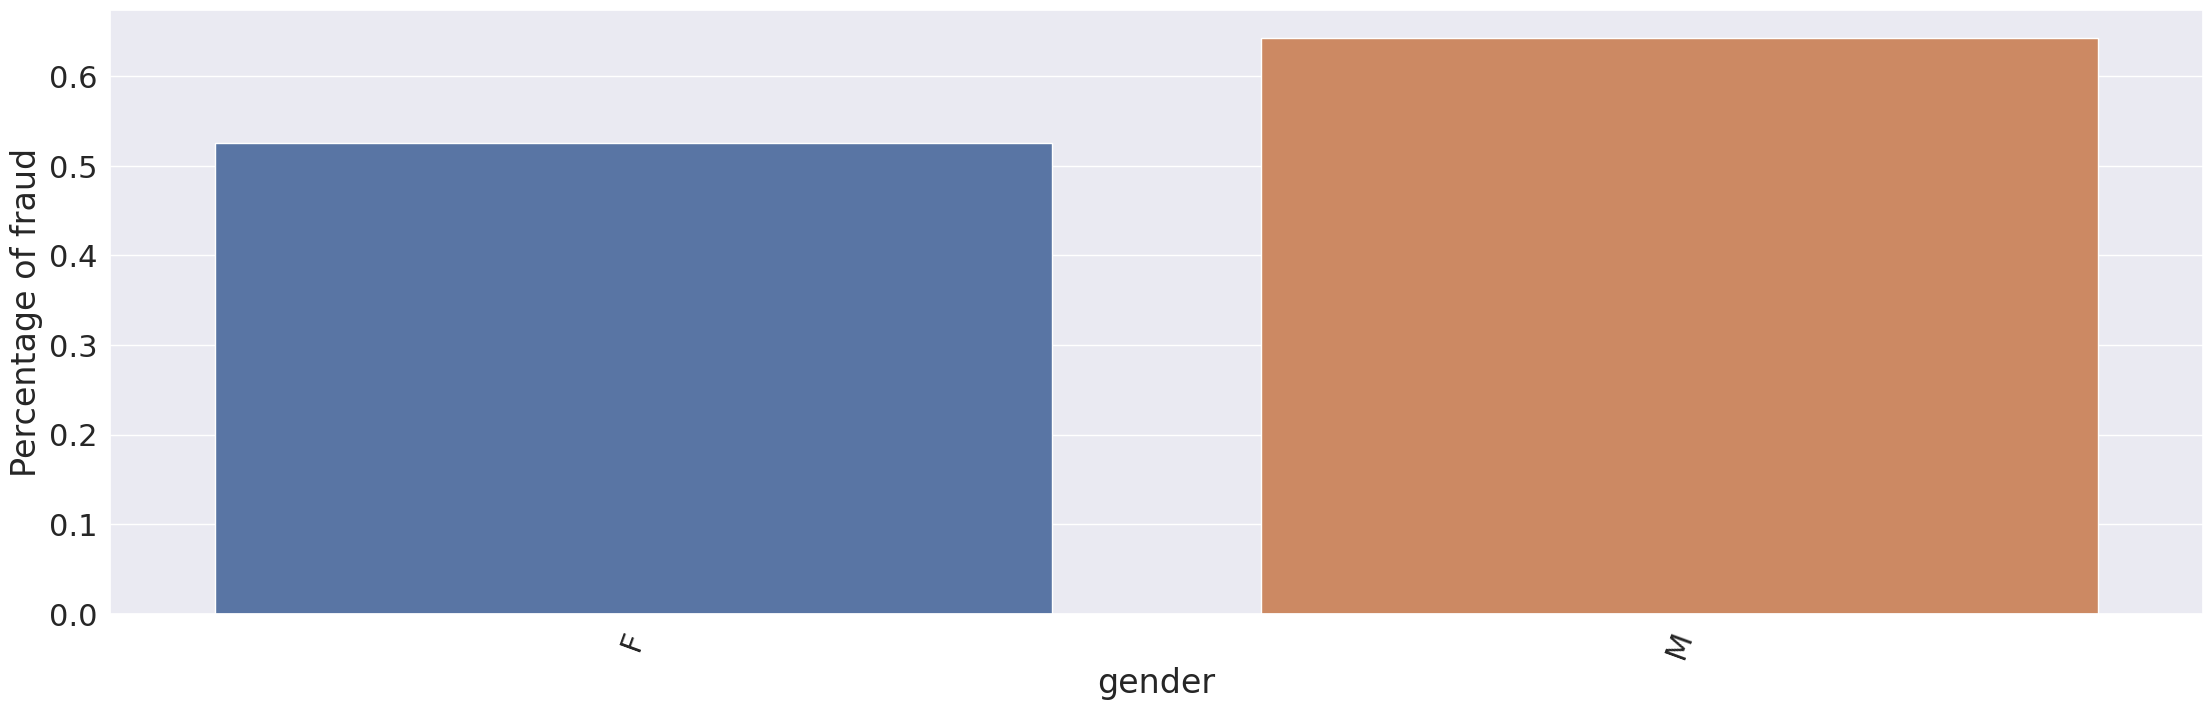

In [177]:
#What about gender?
total_vs_fraud("gender", df, y_lab = "Total number of transactions")

#How are the fradulent transacations distributed over gender?
total("gender", df[df['is_fraud']==1], y_lab = "Total number of fradulent transactions")

#Fraud
fraud_over_total('gender', df)

## Amount and Fraud

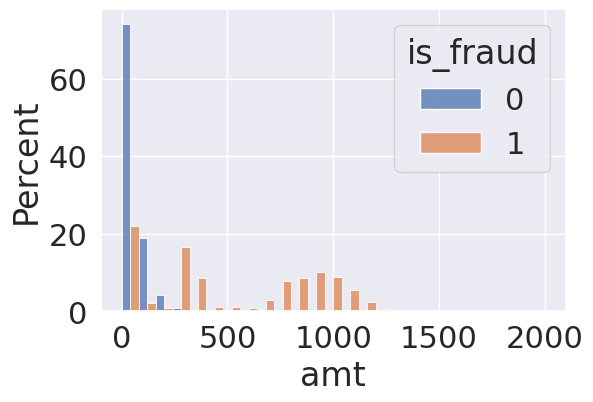

For fradulent transactions


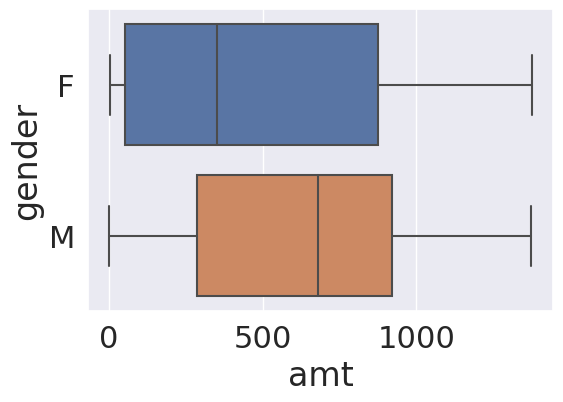

In [178]:
#histogram of amount
sns.histplot(x = 'amt', data = df[df['amt'] < 2000], stat = 'percent', hue='is_fraud', multiple="dodge", bins=25, common_norm = False)
plt.show()

#Spread of fraud transactions
print("For fradulent transactions")
sns.boxplot(x = df[df['is_fraud'] == 1]['amt'], y = df['gender'])
plt.show()

## City population and Fraud

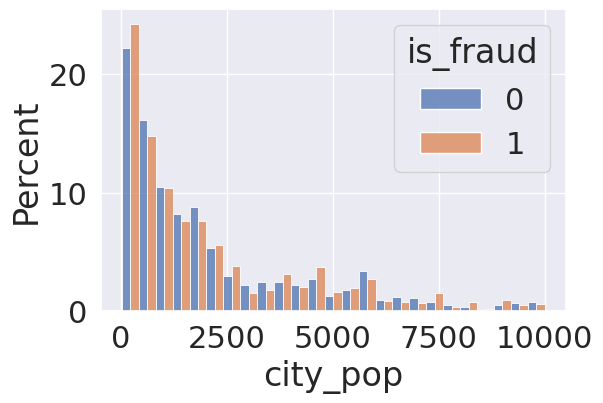

For fradulent transactions


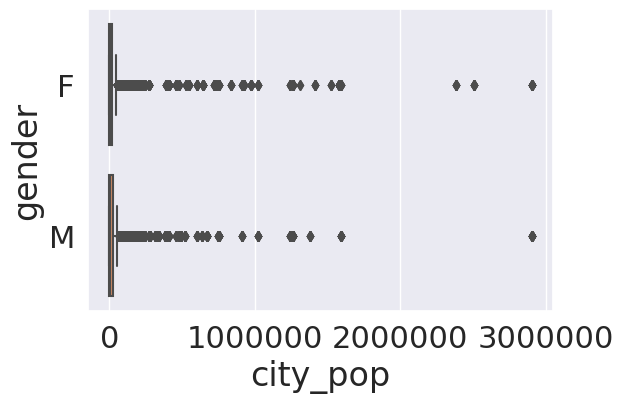

In [179]:
#histogram of population
sns.histplot(x = 'city_pop', data = df[df['city_pop']<10000], stat = 'percent', hue='is_fraud', multiple="dodge", bins=25, common_norm = False)
plt.show()

#Spread of fraud transactions
print("For fradulent transactions")
sns.boxplot(x = df[df['is_fraud'] == 1]['city_pop'], y = df['gender'])
plt.show()

## Age and Fraud

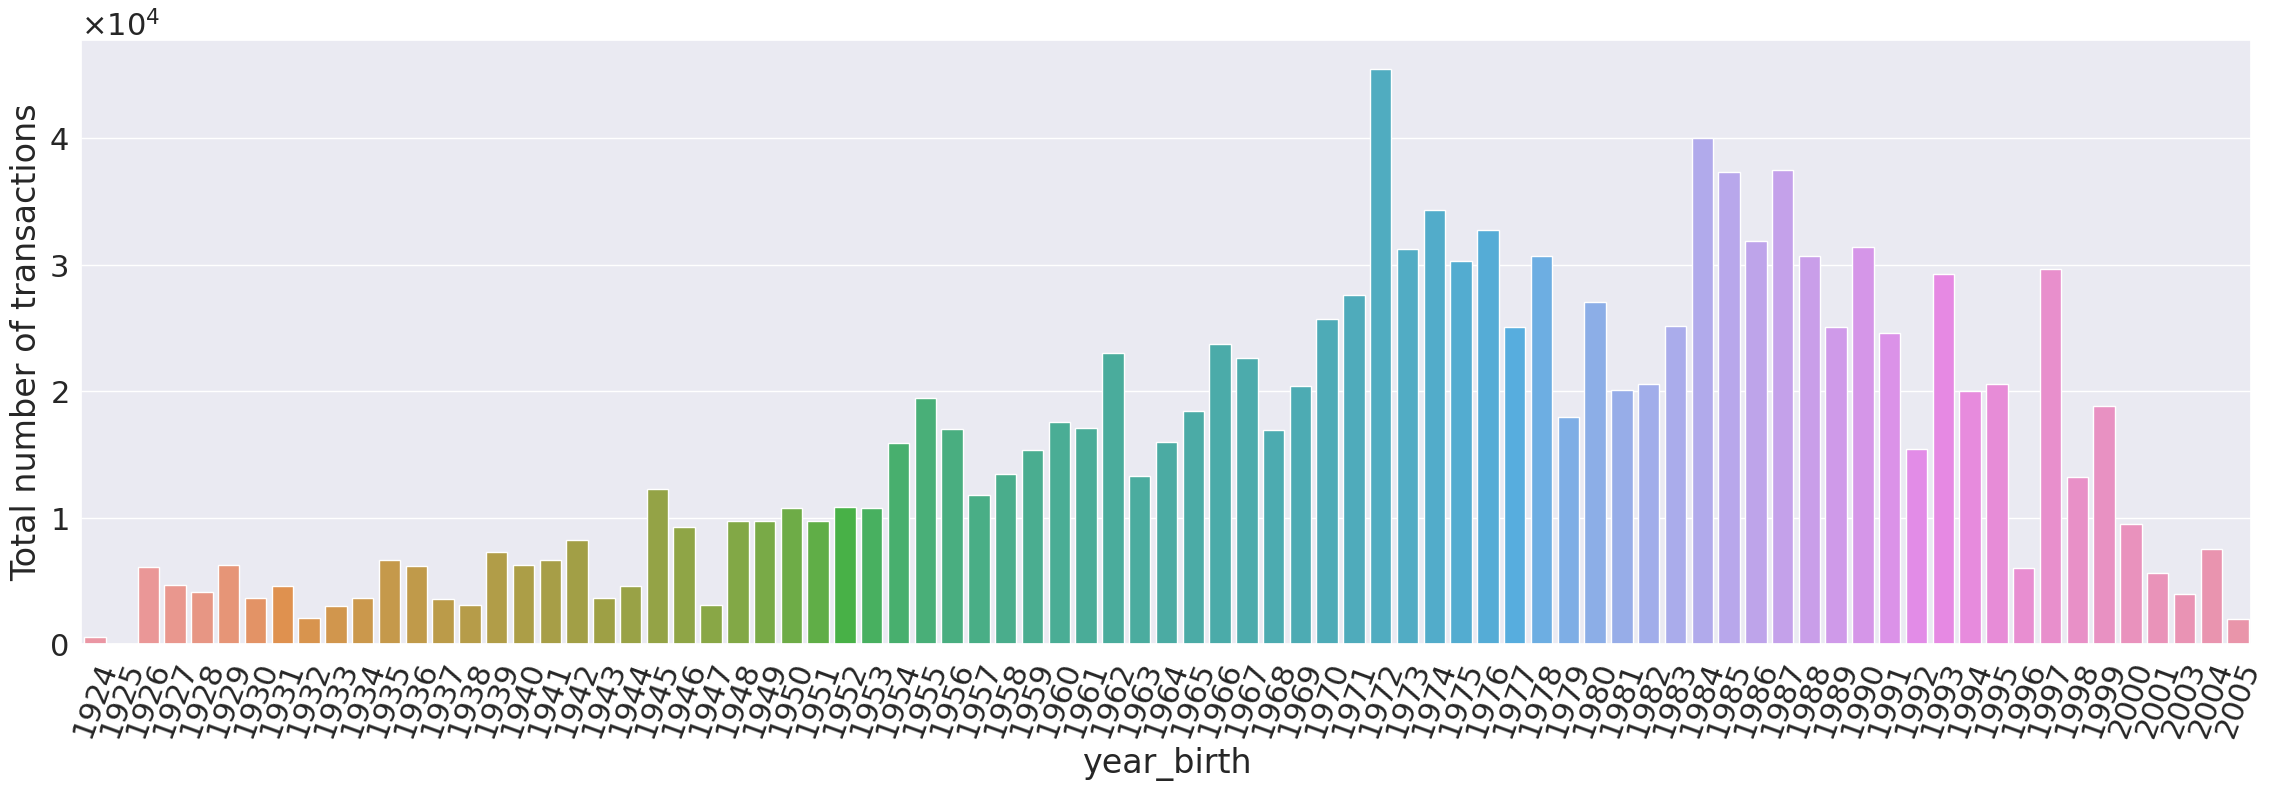

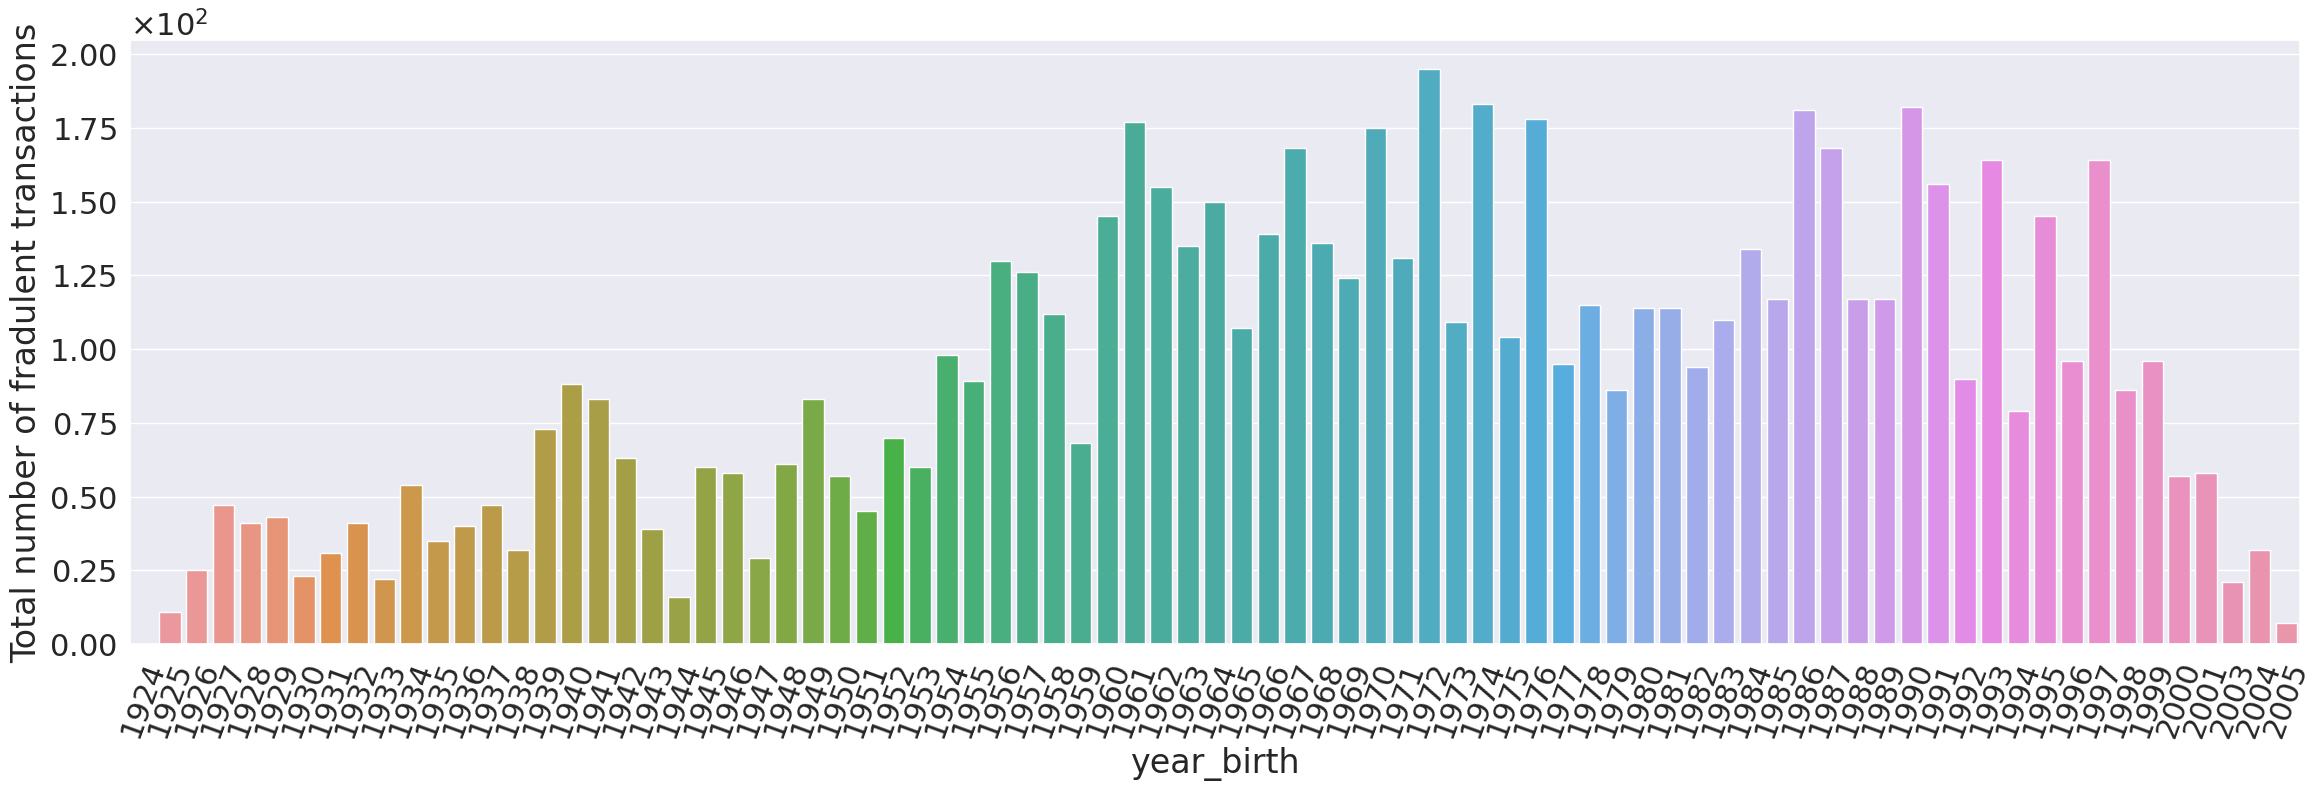

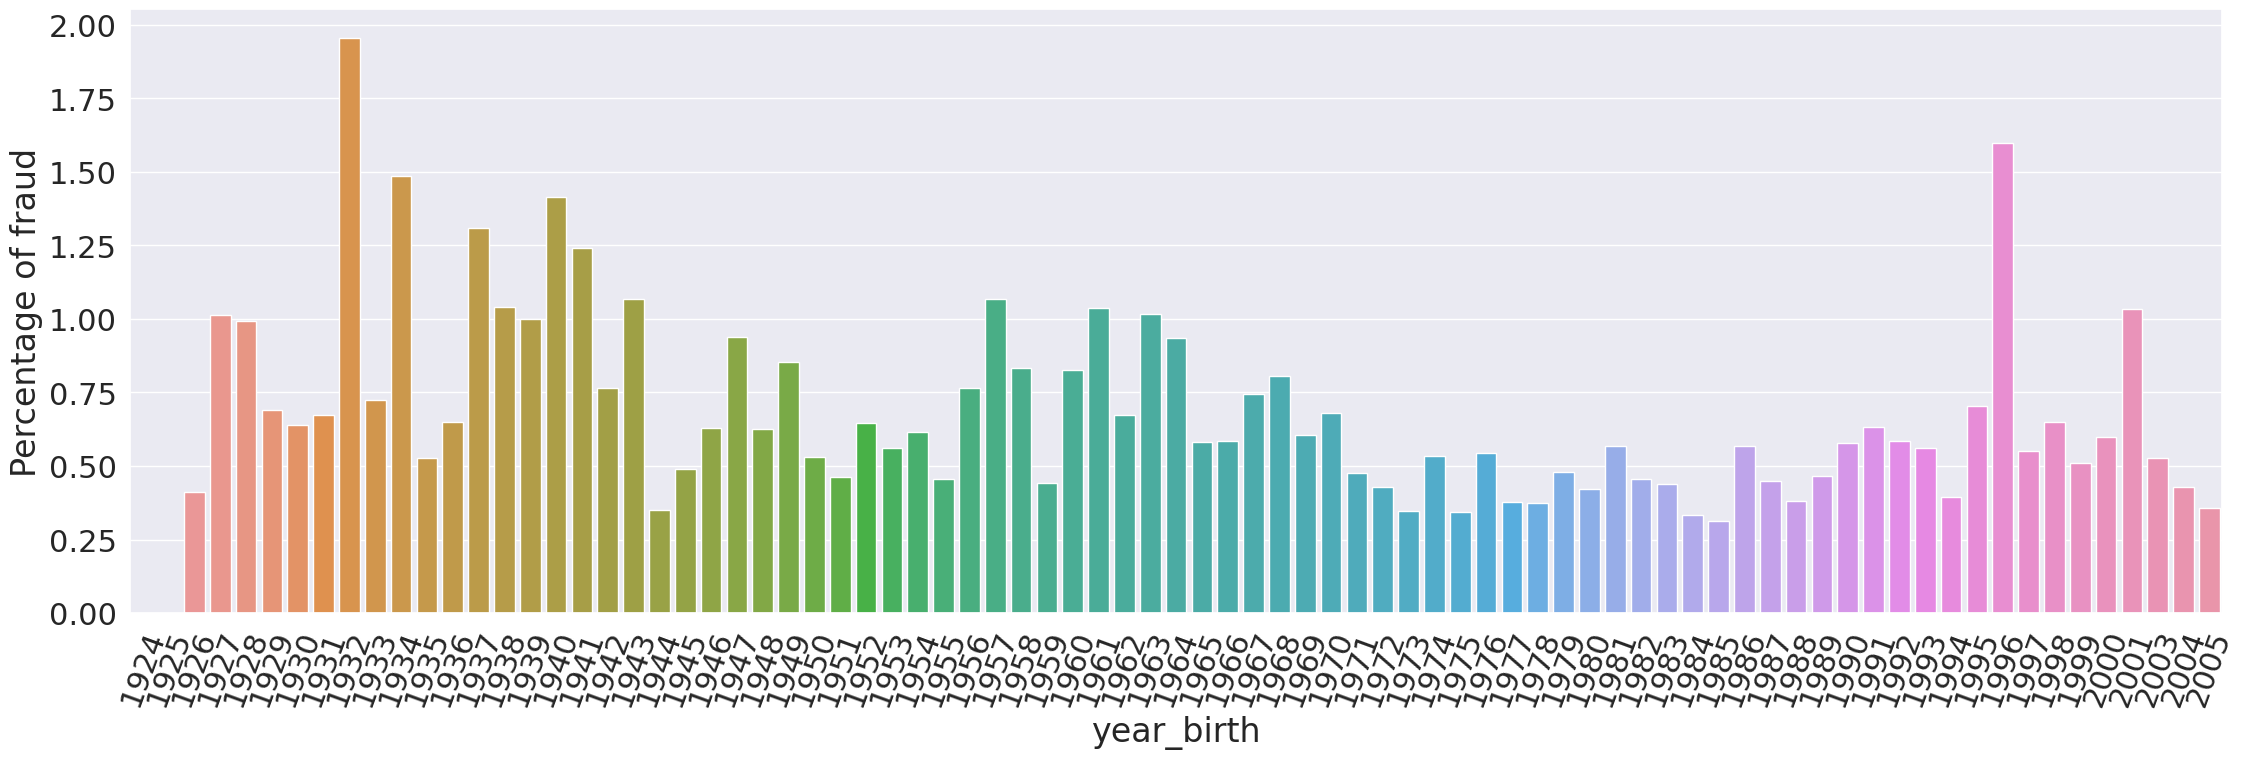

In [180]:
df['year_birth'] = df['dob'].dt.year

#What about Date of birth year?
total_vs_fraud("year_birth", df, y_lab = "Total number of transactions")

#Frauds and dob year?
total_vs_fraud("year_birth", df[df['is_fraud'] == 1], y_lab = "Total number of fradulent transactions")

#Fraud
fraud_over_total('year_birth', df)

## Observations from EDA:
- Credit card numbers do not have the same number of digits
- There are 693 unique merchants (why do they begim with "fraud_"?)
- The category of fraud transactions seem to be fairly distributed over categories where travel contains the minumum number of total transactions while gas_transpost and grocery_pos contain the maximum number of total transactions
- Categories: shopping_net and misc_net are the two catgories that contain the highest percentage of fradulent transactions
- Amount amt is highly skewed, which is a possibility for fraud transactions; this column is also correlated (0.22) with fraud target feature
- No drastic imbalance in gender with respect to total transaction: 55% Female and 45% Male
- Male customers have more fradulent transacton than females by 10%, which is not a big imbalance
- There are 51 unique states in the dataset with maximum transactions in Texas and minimum in Delaware.
- States with overall more transactions do appear to have a greater number of fraudulent transactions overall but the percentage varies.
- Alaska and Rhode Island experience the highest percentage of fradulent transactions
- With respect to age, older people are more prone to fradulent transactions

- There is an imablance in the target feature columns with over 99% transactions being non-fradulent and less than 1% termed fraudulent

## Preprocessing the data
- We need to drop redundant columns that contain location information and only include latitude and longitude, as these two parameters can easily define the location anywhere on Earth
- Define X and y based on columns being included
- Split data into train and test with stratification
- Make a list of numeric and categorical columns
- Create a numerical pipelime for numerical attributes
- And a categorical pipeline for categorical attributes
- Combine the two pipelines as a column transformer
- Transform the data using the full pipeline

### Transform date time column to numeric columns

In [184]:
#Transaction time needs to be divided into parts in order to be included into the model
df['Transaction year'] = df['trans_date_trans_time'].dt.year
df['Transaction month'] = df['trans_date_trans_time'].dt.month
df['Transaction day'] = df['trans_date_trans_time'].dt.day
df['Transaction hour'] = df['trans_date_trans_time'].dt.hour

#Print all columns you choose from
print("Columns:",df.columns)

Columns: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_birth', 'Transaction year',
       'Transaction month', 'Transaction day', 'Transaction hour'],
      dtype='object')


<AxesSubplot:>

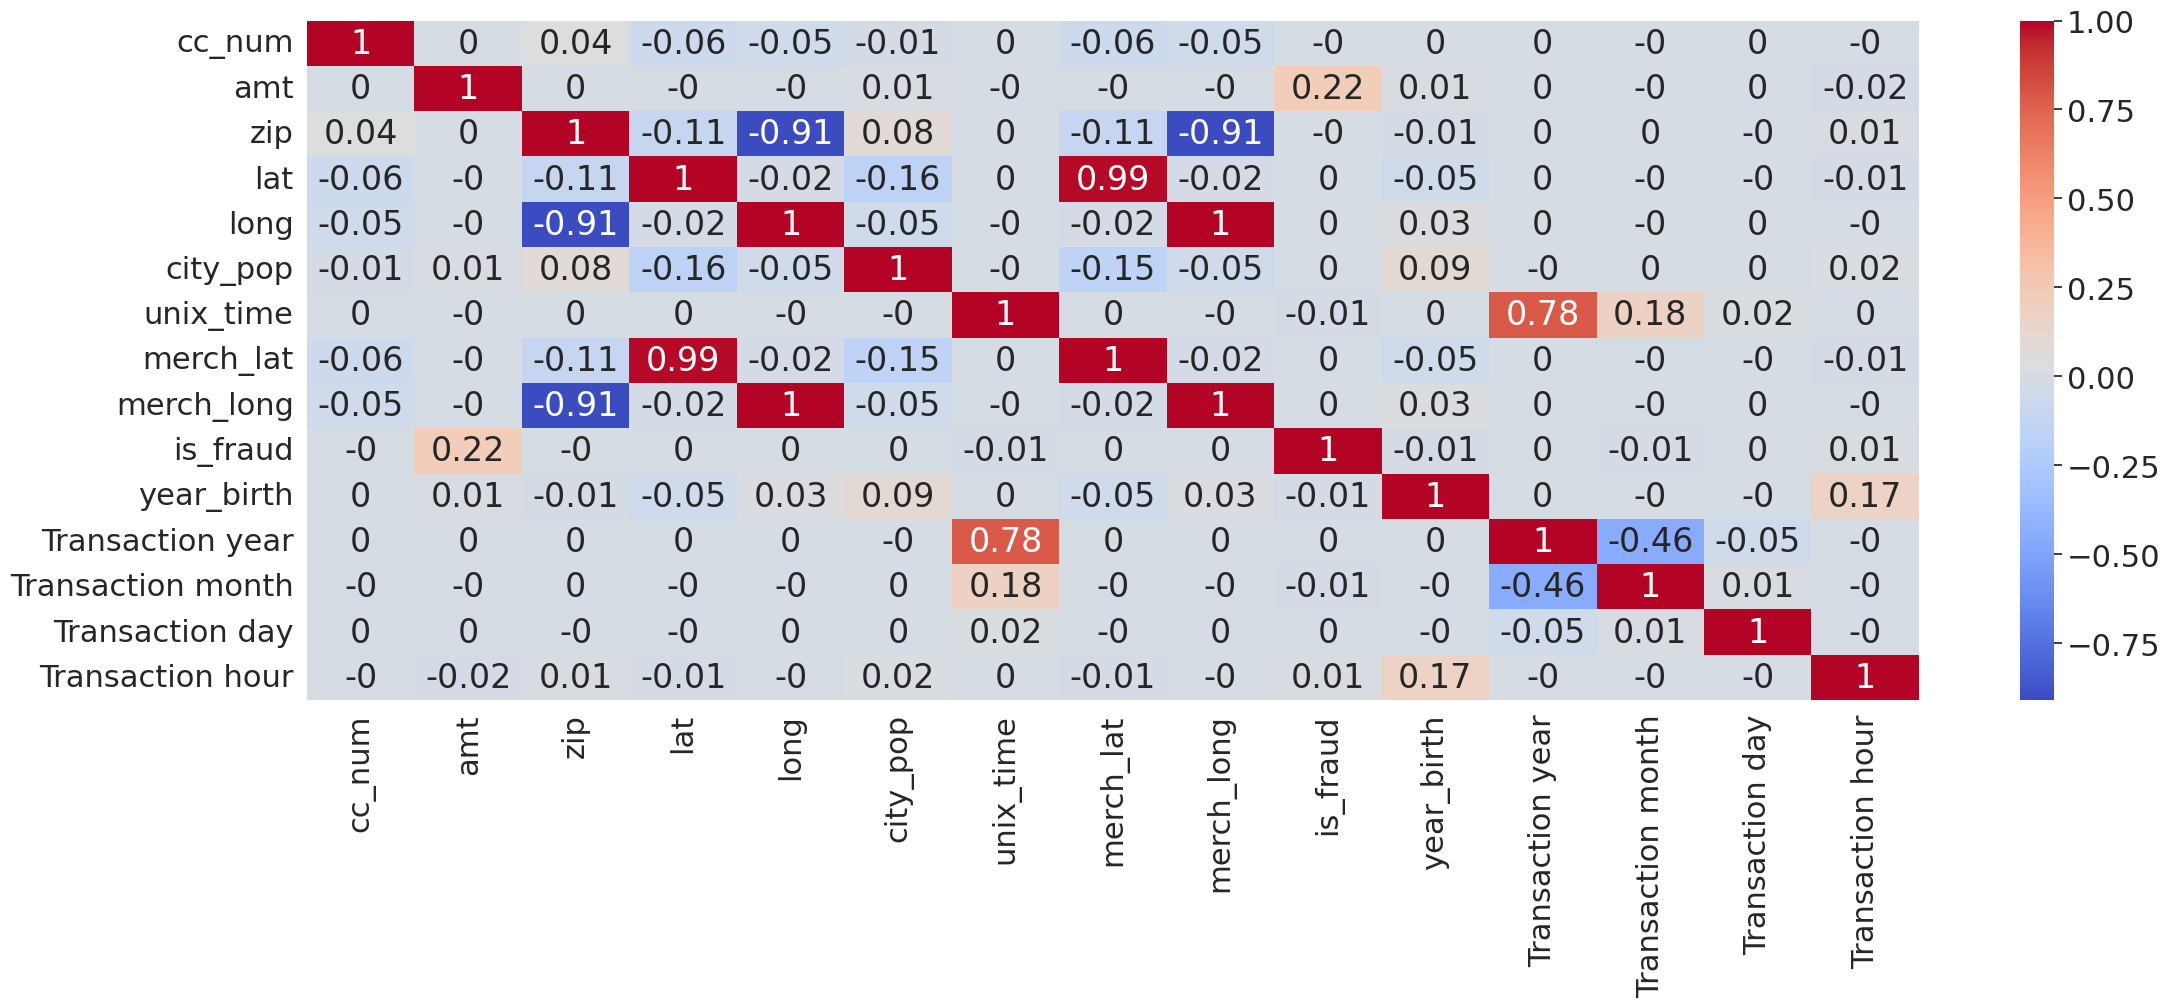

In [207]:
fig = plt.figure(figsize=(26,9))
#mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr().round(2), cmap='coolwarm', annot=True)

### Split data into train and test

In [256]:
#Only consider relevant columns
X = df[['Transaction year', 'Transaction month', 'Transaction day', 'Transaction hour', 
       'category', 'zip', 'city_pop', 'amt', 'lat', 'long', 'year_birth', 'merch_lat', 'merch_long']]
y = df[['is_fraud']]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

print("Shape of training set",X_train.shape)
print("Shape of test set",X_test.shape)

Shape of training set (1037340, 13)
Shape of test set (259335, 13)


In [257]:
y_train.shape

(1037340, 1)

<AxesSubplot:>

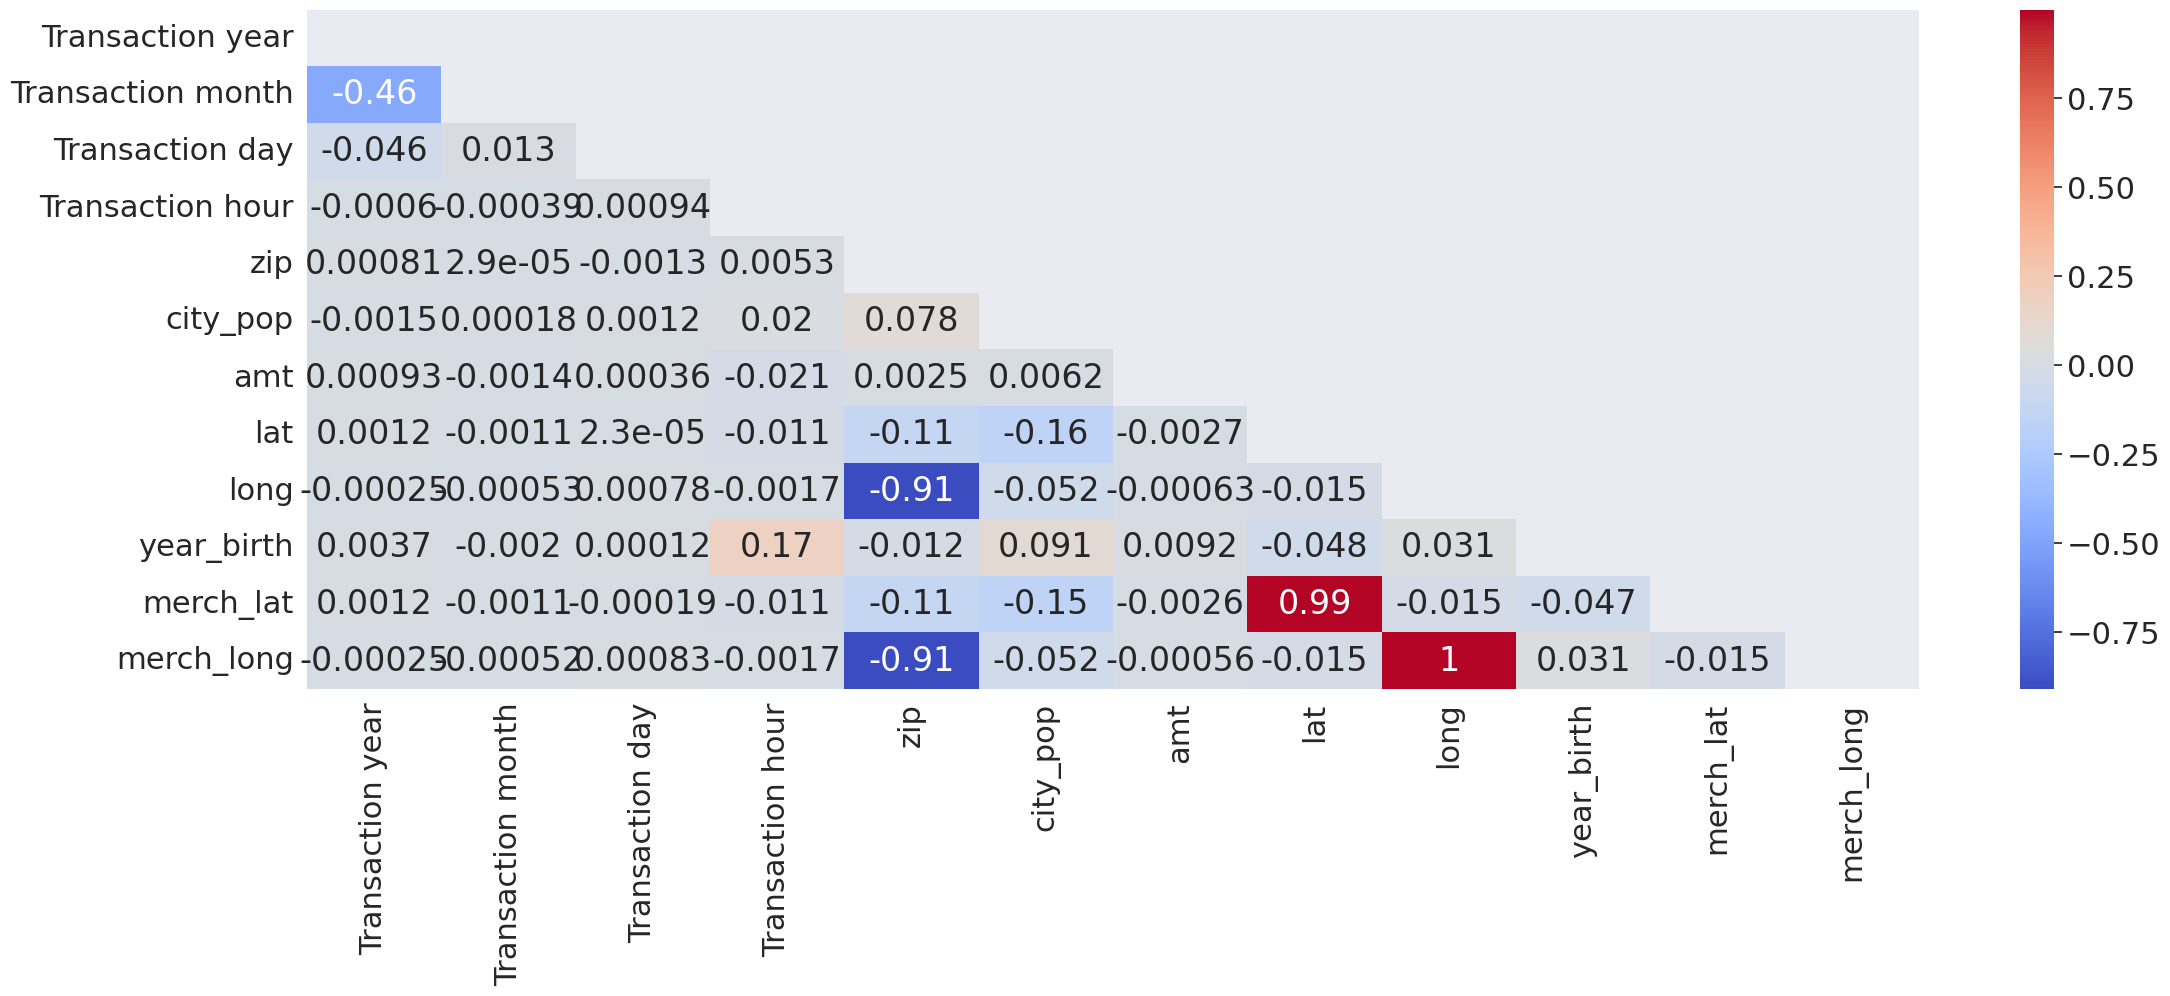

In [258]:
fig = plt.figure(figsize=(26,9))
mask = np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), mask=mask, cmap='coolwarm', annot=True)

### Apply the full pipeline on the training and test set

In [259]:
#Define numerical and categorical columns
df_num = []
df_cat = []
for col in X_train.columns:
    if X_train[col].dtypes == 'object':
        df_cat.append(col)
    else:
        df_num.append(col)

#Attributes for pipeline
num_attribs = df_num
cat_attribs = df_cat

#numeric pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

#categorical pipeline
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder())
])

#combined pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Time to model!

## How to deal with imbalance in classes?
1. First check whether you can get more data- in this case we can not
2. Use the correct peformance metric, we will not use accuracy as the measure of performance but Precision, Recall, F1 score and ROC curve.
3. Sampling methods using bootstrapping: Undersampling the majority class and oversampling the rare samples. It has been debated that this is not necessary if the event is inherently rare which might be true for fradulent transactions?
4. Generate synthetic data using algorithms like SMOTE-Synthetic minority oversampling technique, which creates synthetic samples of the rare class rather than pure copies by selecting various instances. How does it work? By modifying the attributes slightly by a random amount proportional to the difference in neighboring instances.  
5. Resample classes by running ensemble models with different ratios of classes/by runnning an ensemble model on all samples of rare class and a differing amount of abundant class
6. Logistic regression can perform well even in cases of unbalanced classes and the probability threshold can be varied from 0.5
7. Custom cost function that penalizes wrong classification of rare class more than wrong classification of abundant class. Used for a particular model when resampling is not possible. Penalty matric can be too complex for multiple classes.

### Let's start with a simple Logistic Regression
Logistic regression is one of the most popular algorithms for binary classification. 
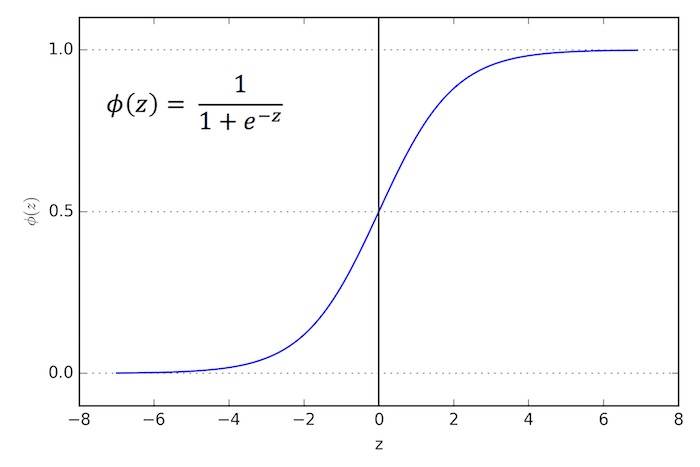
Image Credit: https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/

In [260]:
#define model
logreg = LogisticRegression(max_iter = 1000)
#fit the model
logreg.fit(X_train_prepared, y_train)
#predict on test set
y_pred = logreg.predict(X_test_prepared)
#performance metric
print("For Logistic Regression model:\n")
print('Classification report:\n', classification_report(y_test, y_pred))
#confusion matric
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

#store the result in a dictionary
dict_model = {"LogisticRegression": recall_score(y_test, y_pred)}

For Logistic Regression model:

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.12      0.01      0.02      1501

    accuracy                           0.99    259335
   macro avg       0.56      0.50      0.51    259335
weighted avg       0.99      0.99      0.99    259335

Confusion matrix:
 [[257743     91]
 [  1488     13]]


### Solution I: Try random oversampling on the rare class
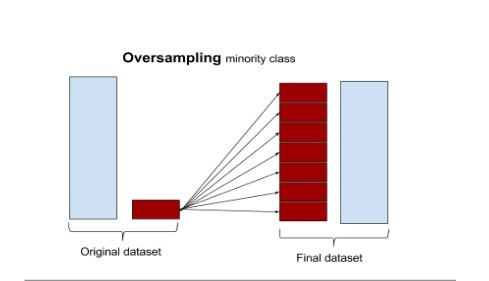
Image Credit: https://i.stack.imgur.com/FEOjd.jpg

In [261]:
#define the sampler
over_sampler = RandomOverSampler(random_state = 32)

# fit and apply the transform
X_prepared_over, y_prepared_over = over_sampler.fit_resample(X_train_prepared, y_train)

#define model
logreg = LogisticRegression(max_iter = 1000)
#fit the model
logreg.fit(X_prepared_over, y_prepared_over)
#predict on test set
y_pred = logreg.predict(X_test_prepared)
#performance metric
print("For oversampled data with Logistic Regression model:\n")
print('Classification report:\n', classification_report(y_test, y_pred))
#confusion matric
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

#store the result in a dictionary
dict_model["OversampledLogisticRegression"] = recall_score(y_test, y_pred)

For oversampled data with Logistic Regression model:

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    257834
           1       0.04      0.76      0.07      1501

    accuracy                           0.89    259335
   macro avg       0.52      0.82      0.51    259335
weighted avg       0.99      0.89      0.93    259335

Confusion matrix:
 [[228823  29011]
 [   364   1137]]


### Solution II: SMOTE
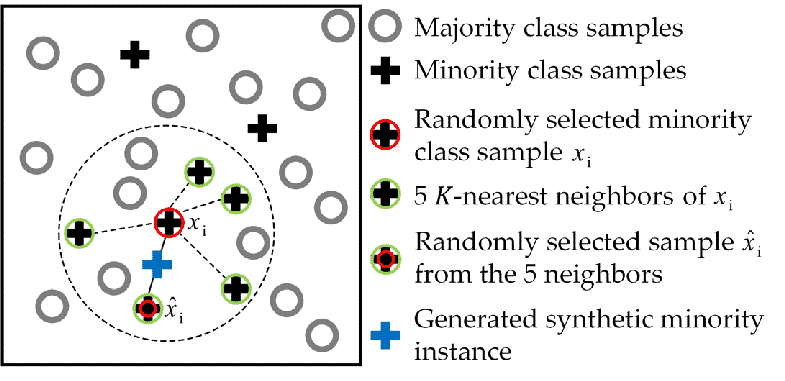
Image Credit: https://rikunert.com/wp-content/uploads/2017/11/the-basic-principle-of-the-synthetic-minority-oversample-technique-smote-algorithm-5452514.png

In [262]:
#define smote
smt = SMOTE(random_state = 32)

# fit and apply the transform
X_prepared_smt, y_prepared_smt = smt.fit_resample(X_train_prepared, y_train)

#define model
logreg = LogisticRegression(max_iter = 1000)
#fit the model
logreg.fit(X_prepared_smt, y_prepared_smt)
#predict on test set
y_pred = logreg.predict(X_test_prepared)
#performance metric
print("For oversampled data with Logistic Regression model:\n")
print('Classification report:\n', classification_report(y_test, y_pred))
#confusion matric
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

#store the result in a dictionary
dict_model["SMOTELogisticRegression"] = recall_score(y_test, y_pred)

For oversampled data with Logistic Regression model:

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    257834
           1       0.04      0.76      0.07      1501

    accuracy                           0.88    259335
   macro avg       0.52      0.82      0.50    259335
weighted avg       0.99      0.88      0.93    259335

Confusion matrix:
 [[226584  31250]
 [   365   1136]]


### Solution III: Try ensemble learning

In [263]:
#define model
rf = RandomForestClassifier(class_weight = "balanced")
#fit the model
rf.fit(X_train_prepared, y_train)
#predict on test set
y_pred = rf.predict(X_test_prepared)
#performance metric
print("For RandomForestClassifier model:\n")
print('Classification report:\n', classification_report(y_test, y_pred))
#confusion matric
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

#store the result in a dictionary
dict_model["RandomForest"] = recall_score(y_test, y_pred)

For Logistic Regression model:

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.96      0.78      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335

Confusion matrix:
 [[257785     49]
 [   325   1176]]


In [270]:
#Voting classifier
log_clf = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators = [('lr', log_clf),
                                           ('rf', rf_clf),
                                           ('svc', svm_clf)])
voting_clf.fit(X_train_prepared, y_train)

#predict on test set
y_pred = rf.predict(X_test_prepared)
#performance metric
print("For Voting Classifier model:\n")
print('Classification report:\n', classification_report(y_test, y_pred))
#confusion matric
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

#store the result in a dictionary
dict_model["VotingClassifier"] = recall_score(y_test, y_pred)

For Logistic Regression model:

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.96      0.78      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335

Confusion matrix:
 [[257785     49]
 [   325   1176]]


### Using the above solutions has improved the recall score on the fraud detection dataset.